In [52]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [54]:
data = pd.read_excel(r'D:\Intership\dsml_train_dataset.xlsx')

In [59]:
data

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,2021-05-01,10.158
1,NTM2,X1,A9,DIRECT,Large,Powder,2020-10-01,134.281
2,NTM3,X2,A20,DIRECT,Large,Powder,2020-12-01,12.456
3,NTM3,X1,A18,WHOLESALE,Small,Powder,2021-02-01,107.220
4,NTM2,X1,A28,DIRECT,Large,Liquid,2020-11-01,197.763
...,...,...,...,...,...,...,...,...
550171,NTM2,X1,A5,DIRECT,Large,Powder,2020-07-01,136.469
550172,NTM3,X1,A14,DIRECT,Large,Liquid,2020-10-01,72.559
550173,NTM2,X1,A5,DIRECT,Small,Powder,2021-03-01,147.639
550174,NTM2,X1,A7,DIRECT,Small,Powder,2021-02-01,150.044


In [67]:
test = pd.read_excel(r'D:\Intership\dsml_test_dataset.xlsx')

In [68]:
test

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM1,X1,A1,DIRECT,Small,Powder,2021-06-21,103.68
1,NTM1,X1,A10,DIRECT,Large,Powder,2021-06-21,155.75
2,NTM1,X1,A10,ECOM,Large,Powder,2021-06-21,143.02
3,NTM1,X1,A11,DIRECT,Large,Powder,2021-06-21,139.39
4,NTM1,X1,A2,DIRECT,Large,Powder,2021-06-21,169.42
...,...,...,...,...,...,...,...,...
91,NTM3,X1,A44,DIRECT,Small,Liquid,2021-06-21,89.57
92,NTM3,X1,A8,DIRECT,Large,Powder,2021-06-21,114.57
93,NTM3,X1,A8,DIRECT,Small,Powder,2021-06-21,111.26
94,NTM3,X2,A20,DIRECT,Large,Powder,2021-06-21,32.32


# Data Preprocessing

In [6]:
print(f'\n---------- Description ----------\n')
table = data.describe().T
display(table)


---------- Description ----------


,count,mean,min,25%,50%,75%,max,std
Month of Sourcing,550176,2020-12-08 10:27:28.769848576,2020-07-01 00:00:00,2020-10-01 00:00:00,2020-12-01 00:00:00,2021-03-01 00:00:00,2021-05-01 00:00:00,NaN
Sourcing Cost,550176.0,108.816793,-196.07,57.0,132.0,146.147,32632.5,104.390097


In [7]:
print(f'\n---------- Information ----------\n')
info = data.info()


---------- Information ----------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550176 entries, 0 to 550175
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ProductType        550176 non-null  object        
 1   Manufacturer       550176 non-null  object        
 2   Area Code          550176 non-null  object        
 3   Sourcing Channel   550176 non-null  object        
 4   Product Size       550176 non-null  object        
 5   Product Type       550176 non-null  object        
 6   Month of Sourcing  550176 non-null  datetime64[ns]
 7   Sourcing Cost      550176 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 33.6+ MB


In [8]:
print(f'\n---------- Null Values ----------\n')
null_counts = data.isnull().sum()

data_null = []

for col, null_count in null_counts.items():
    data_null.append({'Column': col, 'Null Count': null_count})

df = pd.DataFrame(data_null)

df


---------- Null Values ----------


,Column,Null Count
0,ProductType,0
1,Manufacturer,0
2,Area Code,0
3,Sourcing Channel,0
4,Product Size,0
5,Product Type,0
6,Month of Sourcing,0
7,Sourcing Cost,0


In [9]:
print(f'\n---------- Unique Values ----------\n')

unique_counts = data.nunique()

data_unique = []

for col, unique_count in unique_counts.items():
    data_unique.append({'Column': col, 'Unique Count': unique_count})

df = pd.DataFrame(data_unique)

print(df)



---------- Unique Values ----------

              Column  Unique Count
0        ProductType             3
1       Manufacturer             3
2          Area Code            45
3   Sourcing Channel             4
4       Product Size             3
5       Product Type             2
6  Month of Sourcing            11
7      Sourcing Cost          6747


In [10]:
print('Shape of Train dataset is :',data.shape)
print('Size of Train dataset is  :',data.size)

Shape of Train dataset is : (550176, 8)
Size of Train dataset is  : 4401408


In [11]:
duplicates = data.duplicated()

count_duplicates = duplicates.sum()

print("Number of duplicate records:", count_duplicates)

Number of duplicate records: 541165


# Encoding

In [60]:
# Label encoding for categorical variables
label_encoders = {}
for col in data.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Save label encoders for later use
for col, encoder in label_encoders.items():
    joblib.dump(encoder, f'{col}_encoder.pkl')

# Label Mappings

In [61]:
for col, encoder in label_encoders.items():
    print(f"Mapping for {col}:")
    for label, value in zip(encoder.classes_, encoder.transform(encoder.classes_)):
        print(f"{label}: {value}")
    print("\n")

Mapping for ProductType:
NTM1: 0
NTM2: 1
NTM3: 2


Mapping for Manufacturer:
X1: 0
X2: 1
X3: 2


Mapping for Area Code:
A1: 0
A10: 1
A11: 2
A12: 3
A13: 4
A14: 5
A15: 6
A16: 7
A17: 8
A18: 9
A19: 10
A2: 11
A20: 12
A21: 13
A22: 14
A23: 15
A24: 16
A25: 17
A26: 18
A28: 19
A29: 20
A3: 21
A30: 22
A31: 23
A32: 24
A33: 25
A34: 26
A35: 27
A36: 28
A37: 29
A38: 30
A39: 31
A4: 32
A40: 33
A41: 34
A42: 35
A43: 36
A44: 37
A45: 38
A46: 39
A5: 40
A6: 41
A7: 42
A8: 43
A9: 44


Mapping for Sourcing Channel:
DIRECT: 0
ECOM: 1
RETAIL: 2
WHOLESALE: 3


Mapping for Product Size:
ExtraLarge: 0
Large: 1
Small: 2


Mapping for Product Type:
Liquid: 0
Powder: 1



# Exploratory Data Analysis

In [14]:
data

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,2,0,19,3,1,1,2021-05-01,10.158
1,1,0,44,0,1,1,2020-10-01,134.281
2,2,1,12,0,1,1,2020-12-01,12.456
3,2,0,9,3,2,1,2021-02-01,107.220
4,1,0,19,0,1,0,2020-11-01,197.763
...,...,...,...,...,...,...,...,...
550171,1,0,40,0,1,1,2020-07-01,136.469
550172,2,0,5,0,1,0,2020-10-01,72.559
550173,1,0,40,0,2,1,2021-03-01,147.639
550174,1,0,42,0,2,1,2021-02-01,150.044


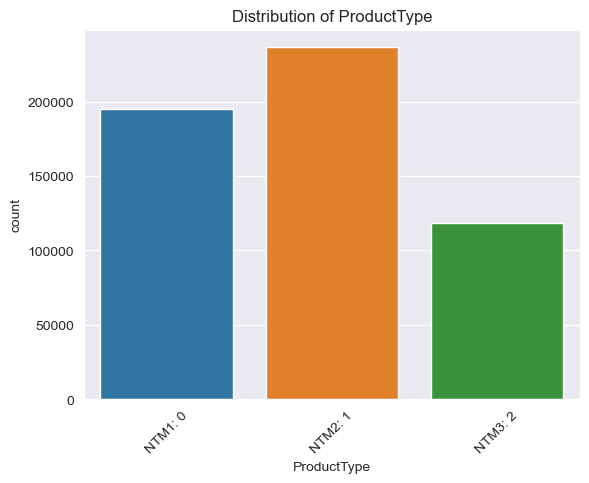

In [15]:
# Distribution of ProductType
sns.countplot(data=data, x='ProductType')
plt.title('Distribution of ProductType')
plt.xticks(rotation=45)

# Legend for ProductType
mapping_product_type = {}
for label, value in zip(label_encoders['ProductType'].classes_, label_encoders['ProductType'].transform(label_encoders['ProductType'].classes_)):
    mapping_product_type[value] = label
plt.xticks(range(len(mapping_product_type)), [f'{label}: {value}' for value, label in mapping_product_type.items()], rotation=45)

plt.show()


([<matplotlib.axis.XTick at 0x203d0ad8810>,
 [Text(0, 0, 'X1: 0'), Text(1, 0, 'X2: 1'), Text(2, 0, 'X3: 2')])

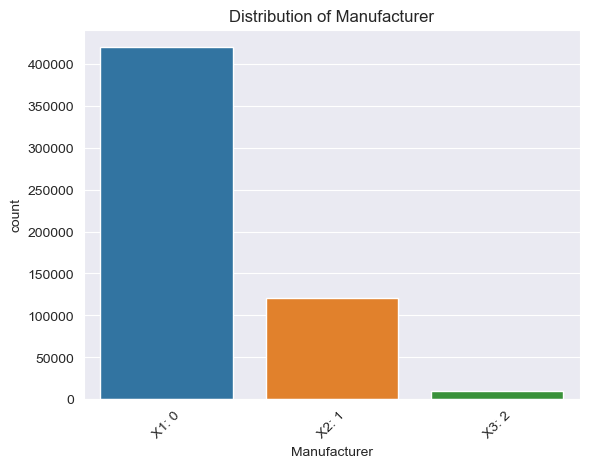

In [16]:
# Distribution of Manufacturer
sns.countplot(data=data, x='Manufacturer')
plt.title('Distribution of Manufacturer')
plt.xticks(rotation=45)

# Legend for Manufacturer
mapping_manufacturer = {}
for label, value in zip(label_encoders['Manufacturer'].classes_, label_encoders['Manufacturer'].transform(label_encoders['Manufacturer'].classes_)):
    mapping_manufacturer[value] = label
plt.xticks(range(len(mapping_manufacturer)), [f'{label}: {value}' for value, label in mapping_manufacturer.items()], rotation=45)


([<matplotlib.axis.XTick at 0x203d129a910>,
 [Text(0, 0, 'A1: 0'),
  Text(1, 0, 'A10: 1'),
  Text(2, 0, 'A11: 2'),
  Text(3, 0, 'A12: 3'),
  Text(4, 0, 'A13: 4'),
  Text(5, 0, 'A14: 5'),
  Text(6, 0, 'A15: 6'),
  Text(7, 0, 'A16: 7'),
  Text(8, 0, 'A17: 8'),
  Text(9, 0, 'A18: 9'),
  Text(10, 0, 'A19: 10'),
  Text(11, 0, 'A2: 11'),
  Text(12, 0, 'A20: 12'),
  Text(13, 0, 'A21: 13'),
  Text(14, 0, 'A22: 14'),
  Text(15, 0, 'A23: 15'),
  Text(16, 0, 'A24: 16'),
  Text(17, 0, 'A25: 17'),
  Text(18, 0, 'A26: 18'),
  Text(19, 0, 'A28: 19'),
  Text(20, 0, 'A29: 20'),
  Text(21, 0, 'A3: 21'),
  Text(22, 0, 'A30: 22'),
  Text(23, 0, 'A31: 23'),
  Text(24, 0, 'A32: 24'),
  Text(25, 0, 'A33: 25'),
  Text(26, 0, 'A34: 26'),
  Text(27, 0, 'A35: 27'),
  Text(28, 0, 'A36: 28'),
  Text(29, 0, 'A37: 29'),
  Text(30, 0, 'A38: 30'),
  Text(31, 0, 'A39: 31'),
  Text(32, 0, 'A4: 32'),
  Text(33, 0, 'A40: 33'),
  Text(34, 0, 'A41: 34'),
  Text(35, 0, 'A42: 35'),
  Text(36, 0, 'A43: 36'),
  Text(37, 0, 'A44

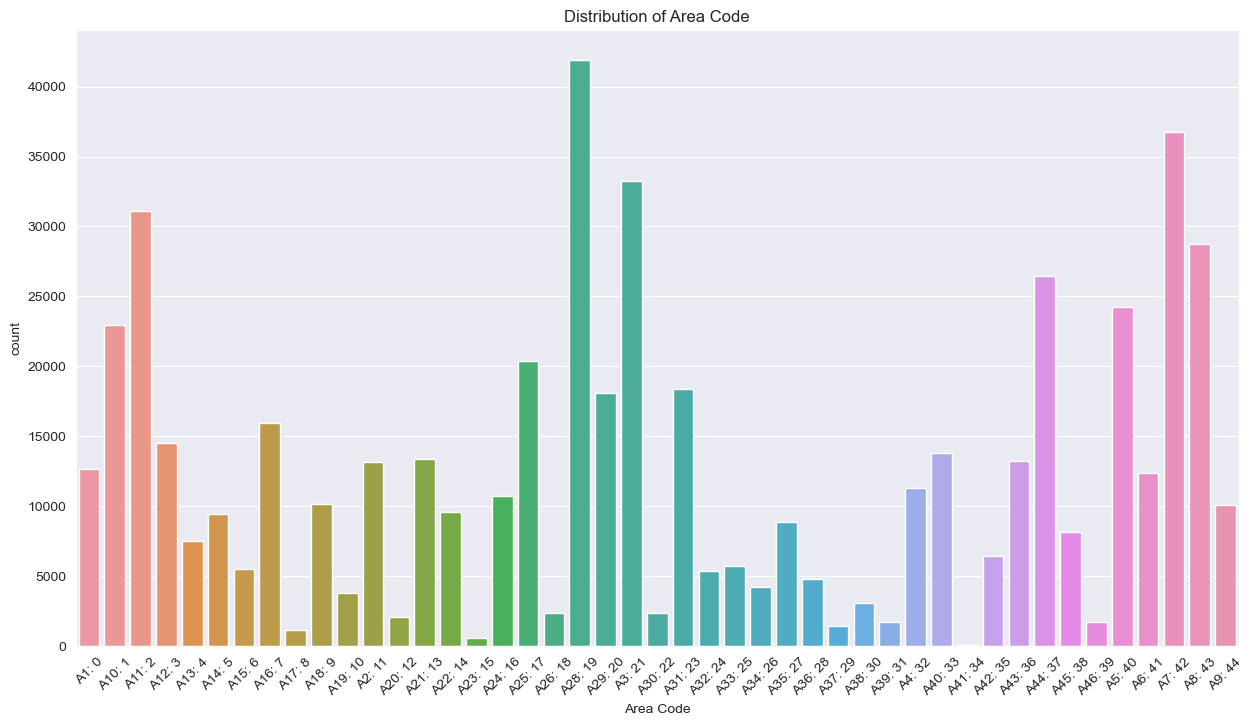

In [17]:
# Distribution of Area Code
plt.figure(figsize=(15,8))
sns.countplot(data=data, x='Area Code')
plt.title('Distribution of Area Code')
plt.xticks(rotation=45)

# Legend for Area Code
mapping_area_code = {}
for label, value in zip(label_encoders['Area Code'].classes_, label_encoders['Area Code'].transform(label_encoders['Area Code'].classes_)):
    mapping_area_code[value] = label
plt.xticks(range(len(mapping_area_code)), [f'{label}: {value}' for value, label in mapping_area_code.items()], rotation=45)


([<matplotlib.axis.XTick at 0x203d2de1950>,
 [Text(0, 0, 'DIRECT: 0'),
  Text(1, 0, 'ECOM: 1'),
  Text(2, 0, 'RETAIL: 2'),
  Text(3, 0, 'WHOLESALE: 3')])

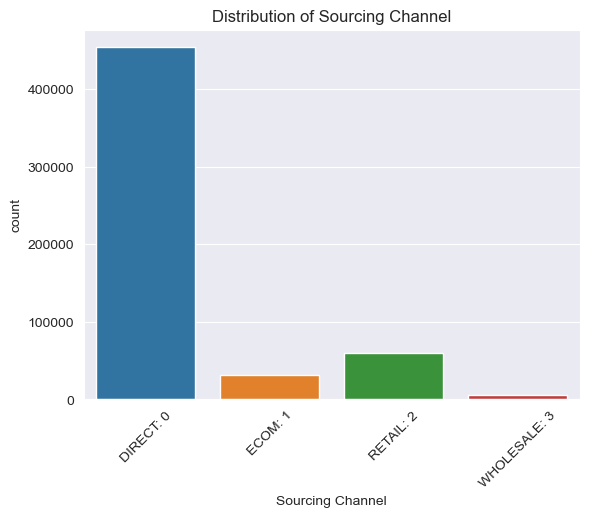

In [18]:
# Distribution of Sourcing Channel
sns.countplot(data=data, x='Sourcing Channel')
plt.title('Distribution of Sourcing Channel')
plt.xticks(rotation=45)

# Legend for Sourcing Channel
mapping_sourcing_channel = {}
for label, value in zip(label_encoders['Sourcing Channel'].classes_, label_encoders['Sourcing Channel'].transform(label_encoders['Sourcing Channel'].classes_)):
    mapping_sourcing_channel[value] = label
plt.xticks(range(len(mapping_sourcing_channel)), [f'{label}: {value}' for value, label in mapping_sourcing_channel.items()], rotation=45)


([<matplotlib.axis.XTick at 0x203da827a50>,
 [Text(0, 0, 'ExtraLarge: 0'), Text(1, 0, 'Large: 1'), Text(2, 0, 'Small: 2')])

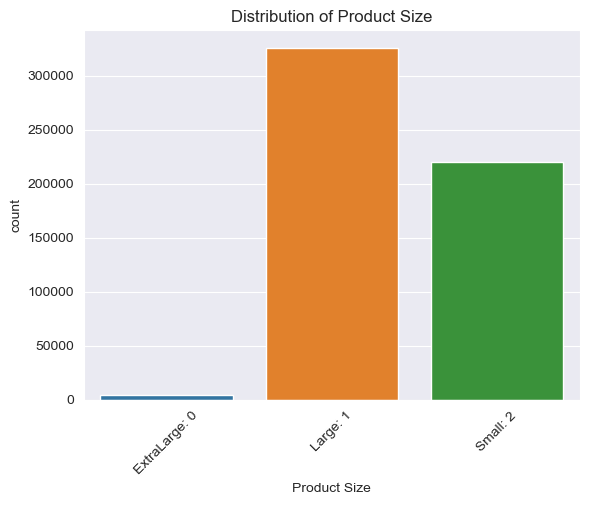

In [19]:
# Distribution of Product Size
sns.countplot(data=data, x='Product Size')
plt.title('Distribution of Product Size')
plt.xticks(rotation=45)

# Legend for Product Size
mapping_product_size = {}
for label, value in zip(label_encoders['Product Size'].classes_, label_encoders['Product Size'].transform(label_encoders['Product Size'].classes_)):
    mapping_product_size[value] = label
plt.xticks(range(len(mapping_product_size)), [f'{label}: {value}' for value, label in mapping_product_size.items()], rotation=45)


([<matplotlib.axis.XTick at 0x203da0956d0>,
 [Text(0, 0, 'Liquid: 0'), Text(1, 0, 'Powder: 1')])

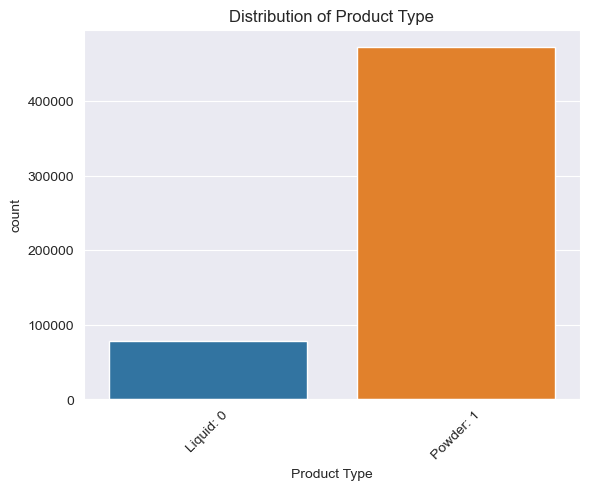

In [20]:
# Distribution of Product Type
sns.countplot(data=data, x='Product Type')
plt.title('Distribution of Product Type')
plt.xticks(rotation=45)

# Legend for Product Type
mapping_product_type = {}
for label, value in zip(label_encoders['Product Type'].classes_, label_encoders['Product Type'].transform(label_encoders['Product Type'].classes_)):
    mapping_product_type[value] = label
plt.xticks(range(len(mapping_product_type)), [f'{label}: {value}' for value, label in mapping_product_type.items()], rotation=45)

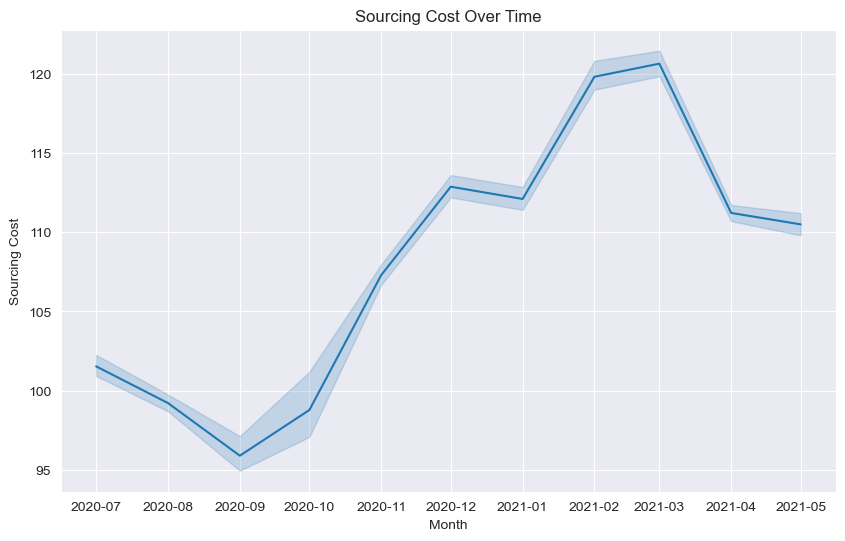

In [21]:
df = data.copy()

df['Year'] = df['Month of Sourcing'].dt.year
df['Month'] = df['Month of Sourcing'].dt.month

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Month of Sourcing', y='Sourcing Cost')
plt.title('Sourcing Cost Over Time')
plt.xlabel('Month')
plt.ylabel('Sourcing Cost')
plt.show()

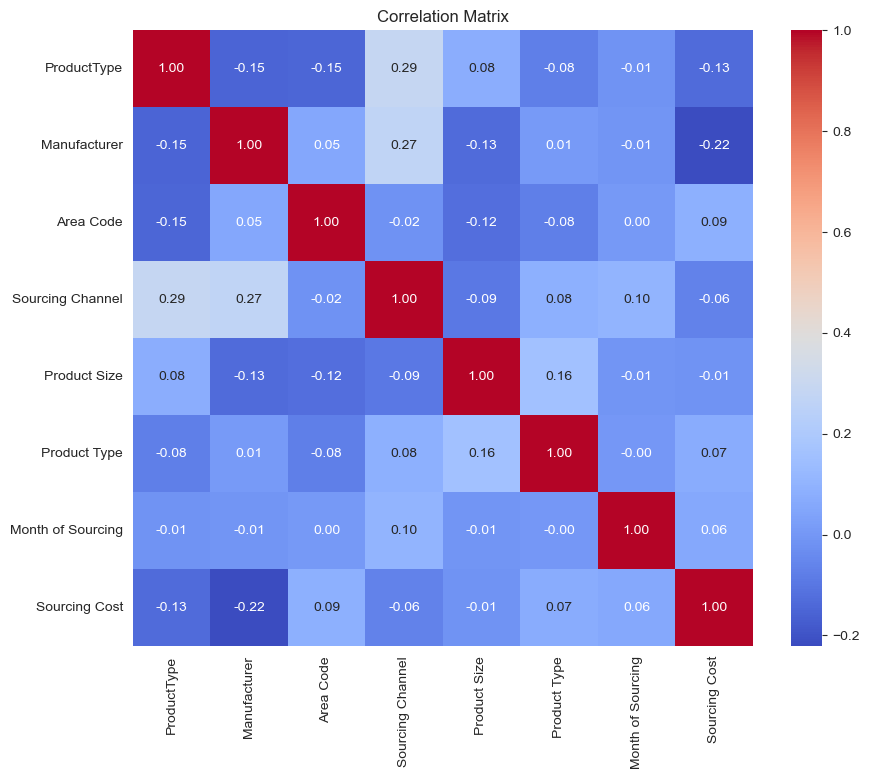

In [22]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# Handling Outliers

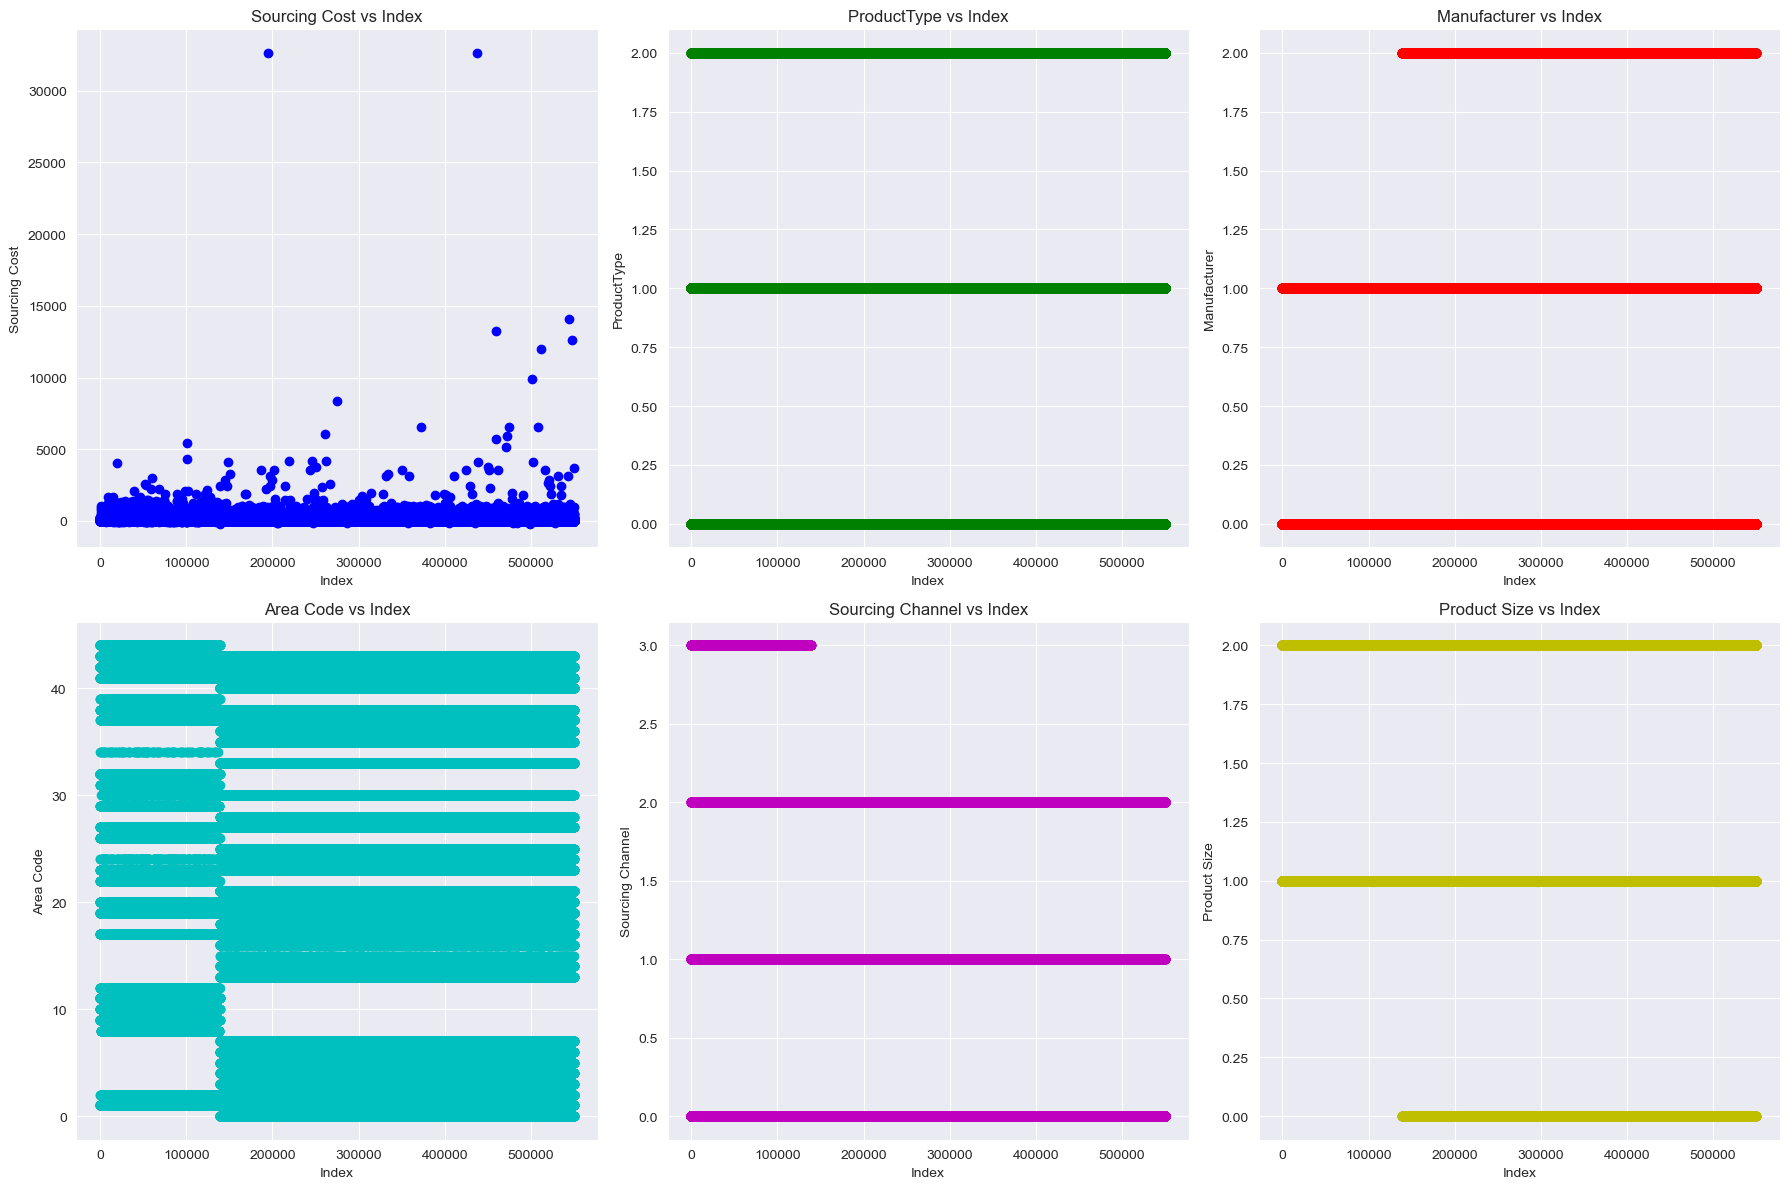

In [23]:
# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Plot Sourcing Cost against index
axs[0, 0].scatter(data.index, data['Sourcing Cost'], color='b')
axs[0, 0].set_title('Sourcing Cost vs Index')
axs[0, 0].set_xlabel('Index')
axs[0, 0].set_ylabel('Sourcing Cost')

# Plot ProductType against index
axs[0, 1].scatter(data.index, data['ProductType'], color='g')
axs[0, 1].set_title('ProductType vs Index')
axs[0, 1].set_xlabel('Index')
axs[0, 1].set_ylabel('ProductType')

# Plot Manufacturer against index
axs[0, 2].scatter(data.index, data['Manufacturer'], color='r')
axs[0, 2].set_title('Manufacturer vs Index')
axs[0, 2].set_xlabel('Index')
axs[0, 2].set_ylabel('Manufacturer')

# Plot Area Code against index
axs[1, 0].scatter(data.index, data['Area Code'], color='c')
axs[1, 0].set_title('Area Code vs Index')
axs[1, 0].set_xlabel('Index')
axs[1, 0].set_ylabel('Area Code')

# Plot Sourcing Channel against index
axs[1, 1].scatter(data.index, data['Sourcing Channel'], color='m')
axs[1, 1].set_title('Sourcing Channel vs Index')
axs[1, 1].set_xlabel('Index')
axs[1, 1].set_ylabel('Sourcing Channel')

# Plot Product Size against index
axs[1, 2].scatter(data.index, data['Product Size'], color='y')
axs[1, 2].set_title('Product Size vs Index')
axs[1, 2].set_xlabel('Index')
axs[1, 2].set_ylabel('Product Size')

plt.tight_layout()
plt.show()

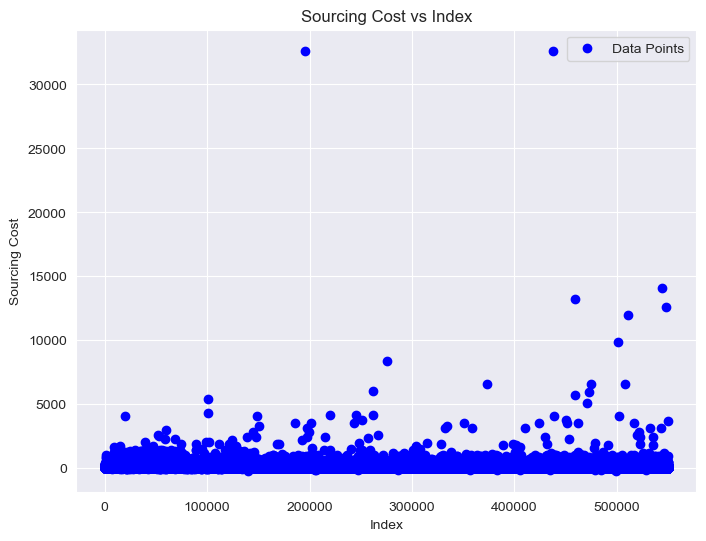

In [24]:
# Create a scatter plot of Sourcing Cost against index
plt.figure(figsize=(8, 6))
plt.scatter(data.index, data['Sourcing Cost'], color='b', label='Data Points')

plt.title('Sourcing Cost vs Index')
plt.xlabel('Index')
plt.ylabel('Sourcing Cost')
plt.legend()
plt.grid(True)
plt.show()

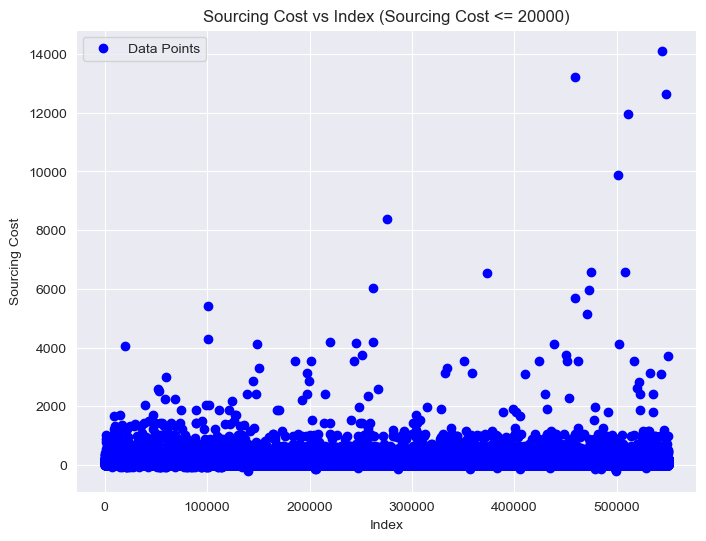

In [62]:
# Filter data
data = data[data['Sourcing Cost'] <= 20000]

# Create a scatter plot of Sourcing Cost against index
plt.figure(figsize=(8, 6))
plt.scatter(data.index, data['Sourcing Cost'], color='b', label='Data Points')

plt.title('Sourcing Cost vs Index (Sourcing Cost <= 20000)')
plt.xlabel('Index')
plt.ylabel('Sourcing Cost')
plt.legend()
plt.grid(True)
plt.show()

In [63]:
data

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,2,0,19,3,1,1,2021-05-01,10.158
1,1,0,44,0,1,1,2020-10-01,134.281
2,2,1,12,0,1,1,2020-12-01,12.456
3,2,0,9,3,2,1,2021-02-01,107.220
4,1,0,19,0,1,0,2020-11-01,197.763
...,...,...,...,...,...,...,...,...
550171,1,0,40,0,1,1,2020-07-01,136.469
550172,2,0,5,0,1,0,2020-10-01,72.559
550173,1,0,40,0,2,1,2021-03-01,147.639
550174,1,0,42,0,2,1,2021-02-01,150.044


# Model Training

## ARIMA

In [64]:
train_data = data.copy()
train_data['Month of Sourcing'] = pd.to_datetime(train_data['Month of Sourcing'])
train_data.set_index('Month of Sourcing', inplace=True)

# Splitting the data into train and test sets
train_size = int(len(train_data) * 0.8)
train, test = train_data[:train_size], train_data[train_size:]

# Define exogenous variables
exog_train = train[['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type']]
exog_test = test[['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type']]

# Define and fit the ARIMA model with exogenous variables
order = (5, 1, 0)  # Example order, you can adjust these parameters
model_arima = ARIMA(train['Sourcing Cost'], exog=exog_train, order=order)
model_arima_fit = model_arima.fit()

# Forecast
forecast = model_arima_fit.forecast(steps=len(test), exog=exog_test)

# Evaluate the ARIMA model
mse_arima = mean_squared_error(test['Sourcing Cost'], forecast)
print("Mean Squared Error (ARIMA):", mse_arima)

Mean Squared Error (ARIMA): 12941.065095669712


In [69]:
# Load the ARIMA test dataset
test_data_arima = test.copy()

# Load label encoders for categorical variables
label_encoders_arima = {}
for col in test_data_arima.select_dtypes(include=['object']).columns:
    encoder = joblib.load(f'{col}_encoder.pkl')
    label_encoders_arima[col] = encoder

# Encode categorical variables
for col, encoder in label_encoders_arima.items():
    test_data_arima[col] = encoder.transform(test_data_arima[col])

# Convert 'Month of Sourcing' to datetime
test_data_arima['Month of Sourcing'] = pd.to_datetime(test_data_arima['Month of Sourcing'])

# Set 'Month of Sourcing' as index
test_data_arima.set_index('Month of Sourcing', inplace=True)

# Define exogenous variables for the ARIMA model
exog_test_arima = test_data_arima[['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type']]

# Forecast using the ARIMA model
forecast_arima = model_arima_fit.forecast(steps=len(test_data_arima), exog=exog_test_arima)

# Evaluate the ARIMA model
mse_arima = mean_squared_error(test_data_arima['Sourcing Cost'], forecast_arima)
print("Mean Squared Error (ARIMA  - Test ):", mse_arima)
rmse_test_rf = np.sqrt(mse_arima)
print("Root Mean Squared Error (ARIMA - Test):", rmse_test_rf)

Mean Squared Error (ARIMA  - Test ): 2406.778295792887
Root Mean Squared Error (ARIMA - Test): 49.05892676968063


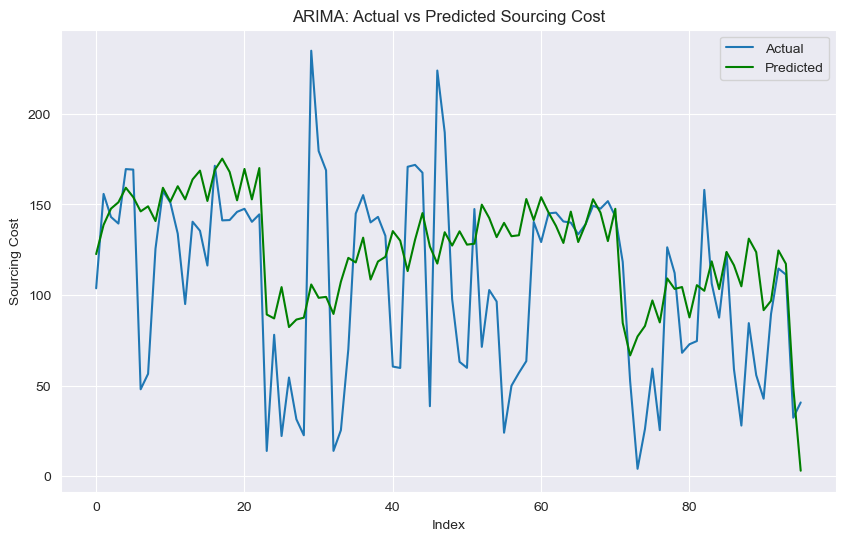

In [98]:
# Plot the actual vs. predicted values for ARIMA
forecast_arima_reset = forecast_arima.reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.plot(test['Sourcing Cost'], label='Actual')
plt.plot(forecast_arima_reset, label='Predicted', color='green')
plt.xlabel('Index')
plt.ylabel('Sourcing Cost')
plt.title('ARIMA: Actual vs Predicted Sourcing Cost')
plt.legend()
plt.grid(True)
plt.show()


## Random Forest

In [28]:
# Convert 'Month of Sourcing' to datetime
data['Month of Sourcing'] = pd.to_datetime(data['Month of Sourcing'])

# Extract year, month, and quarter
data['Year'] = data['Month of Sourcing'].dt.year
data['Month'] = data['Month of Sourcing'].dt.month
data['Quarter'] = data['Month of Sourcing'].dt.quarter

# Drop the original 'Month of Sourcing' column
data.drop('Month of Sourcing', axis=1, inplace=True)

In [29]:
# Splitting the data into features and target variable
X = data.drop('Sourcing Cost', axis=1)
y = data['Sourcing Cost']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Model training
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Model evaluation
y_pred = model_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 4287.377374650093


In [31]:
# Load the test dataset
test_data_rf = test.copy()

# Load label encoders
label_encoders_rf = {}
for col in test_data_rf.select_dtypes(include=['object']).columns:
    encoder = joblib.load(f'{col}_encoder.pkl')
    label_encoders_rf[col] = encoder

# Encode categorical variables
for col, encoder in label_encoders_rf.items():
    test_data_rf[col] = encoder.transform(test_data_rf[col])

# Convert 'Month of Sourcing' to datetime
test_data_rf['Month of Sourcing'] = pd.to_datetime(test_data_rf['Month of Sourcing'])

# Extract year, month, and quarter
test_data_rf['Year'] = test_data_rf['Month of Sourcing'].dt.year
test_data_rf['Month'] = test_data_rf['Month of Sourcing'].dt.month
test_data_rf['Quarter'] = test_data_rf['Month of Sourcing'].dt.quarter

# Drop the original 'Month of Sourcing' column
test_data_rf.drop('Month of Sourcing', axis=1, inplace=True)

# Make predictions using the trained Random Forest model
y_pred_test_rf = model_rf.predict(test_data_rf.drop('Sourcing Cost', axis=1))

# Calculate Mean Squared Error (MSE) using the original sourcing costs
mse_test_rf = mean_squared_error(test['Sourcing Cost'], y_pred_test_rf)
print("Mean Squared Error (Random Forest - Test):", mse_test_rf)
rmse_test_rf = np.sqrt(mse_test_rf)
print("Root Mean Squared Error (Random Forest - Test):", rmse_test_rf)


Mean Squared Error (Random Forest - Test): 1074.0164835062415
Root Mean Squared Error (Random Forest - Test): 32.77219070349496


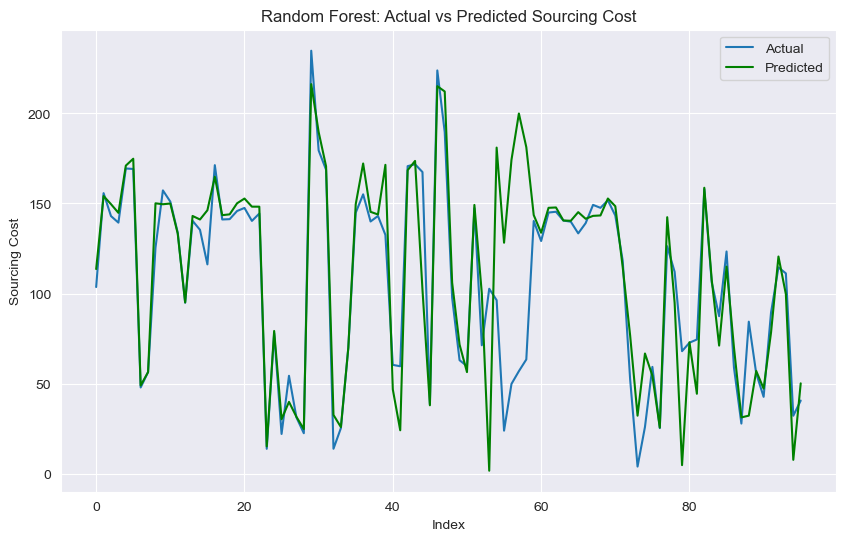

In [32]:
# Plot the actual vs. predicted values for Random Forest
plt.figure(figsize=(10, 6))
plt.plot(test['Sourcing Cost'], label='Actual')
plt.plot(y_pred_test_rf, label='Predicted', color='green')
plt.xlabel('Index')
plt.ylabel('Sourcing Cost')
plt.title('Random Forest: Actual vs Predicted Sourcing Cost')
plt.legend()
plt.grid(True)
plt.show()


# Gradient Boosting

In [33]:
# Model training
model_gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
model_gb.fit(X_train, y_train)

# Model evaluation
y_pred_gb = model_gb.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
print("Mean Squared Error (Gradient Boosting):", mse_gb)

Mean Squared Error (Gradient Boosting): 4286.061821966128


In [34]:
# Load the test dataset
test_data_gb = test.copy()

# Load label encoders
label_encoders_gb = {}
for col in test_data_gb.select_dtypes(include=['object']).columns:
    encoder = joblib.load(f'{col}_encoder.pkl')
    label_encoders_gb[col] = encoder

# Encode categorical variables
for col, encoder in label_encoders_gb.items():
    test_data_gb[col] = encoder.transform(test_data_gb[col])

# Convert 'Month of Sourcing' to datetime
test_data_gb['Month of Sourcing'] = pd.to_datetime(test_data_gb['Month of Sourcing'])

# Extract year, month, and quarter
test_data_gb['Year'] = test_data_gb['Month of Sourcing'].dt.year
test_data_gb['Month'] = test_data_gb['Month of Sourcing'].dt.month
test_data_gb['Quarter'] = test_data_gb['Month of Sourcing'].dt.quarter

# Drop the original 'Month of Sourcing' column
test_data_gb.drop('Month of Sourcing', axis=1, inplace=True)

# Make predictions using the trained Gradient Boosting Regressor model
y_pred_test_gb = model_gb.predict(test_data_gb.drop('Sourcing Cost', axis=1))

# Calculate Mean Squared Error (MSE) using the original sourcing costs
mse_test_gb = mean_squared_error(test['Sourcing Cost'], y_pred_test_gb)
print("Mean Squared Error (Gradient Boosting Regressor - Test):", mse_test_gb)
rmse_test_gb = np.sqrt(mse_test_gb)
print("Root Mean Squared Error (Gradient Boosting Regressor - Test):", rmse_test_gb)


Mean Squared Error (Gradient Boosting Regressor - Test): 1427.2156508849637
Root Mean Squared Error (Gradient Boosting Regressor - Test): 37.77850779060713


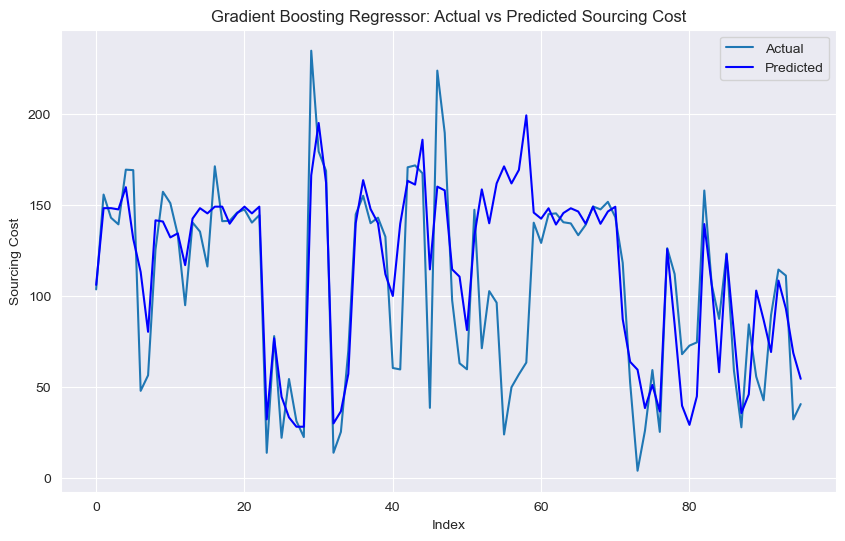

In [35]:
# Plot the actual vs. predicted values for Gradient Boosting Regressor
plt.figure(figsize=(10, 6))
plt.plot(test['Sourcing Cost'], label='Actual')
plt.plot(y_pred_test_gb, label='Predicted', color='blue')
plt.xlabel('Index')
plt.ylabel('Sourcing Cost')
plt.title('Gradient Boosting Regressor: Actual vs Predicted Sourcing Cost')
plt.legend()
plt.grid(True)
plt.show()


# LightGBM

In [36]:
# Convert the dataset to LightGBM format
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)

# Define parameters for LightGBM model
params = {
    'objective': 'regression',
    'metric': 'mse',
    'num_leaves': 31,
    'learning_rate': 0.1,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# Train the LightGBM model
model_lgb = lgb.train(params,
                      lgb_train,
                      num_boost_round=100,
                      valid_sets=lgb_test)

# Model evaluation
y_pred_lgb = model_lgb.predict(X_test, num_iteration=model_lgb.best_iteration)
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
print("Mean Squared Error (LightGBM):", mse_lgb)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
Mean Squared Error (LightGBM): 3698.6359404240056


In [37]:
# Load the test dataset
test_data = test.copy()

# Load label encoders
label_encoders = {}
for col in test_data.select_dtypes(include=['object']).columns:
    encoder = joblib.load(f'{col}_encoder.pkl')
    label_encoders[col] = encoder

# Encode categorical variables
for col, encoder in label_encoders.items():
    test_data[col] = encoder.transform(test_data[col])
    
# Convert 'Month of Sourcing' to datetime
test_data['Month of Sourcing'] = pd.to_datetime(test_data['Month of Sourcing'])

# Extract year, month, and quarter
test_data['Year'] = test_data['Month of Sourcing'].dt.year
test_data['Month'] = test_data['Month of Sourcing'].dt.month
test_data['Quarter'] = test_data['Month of Sourcing'].dt.quarter

# Drop the original 'Month of Sourcing' column
test_data.drop('Month of Sourcing', axis=1, inplace=True)

# Make predictions using the trained LightGBM model
y_pred_test = model_lgb.predict(test_data.drop('Sourcing Cost', axis=1))

# Calculate Mean Squared Error (MSE) using the original sourcing costs
mse_test = mean_squared_error(test['Sourcing Cost'], y_pred_test)
print("Mean Squared Error (Test):", mse_test)
rmse_test = np.sqrt(mse_test)
print("Root Mean Squared Error (Test):", rmse_test)

Mean Squared Error (Test): 1037.7532450820283
Root Mean Squared Error (Test): 32.214177703024305


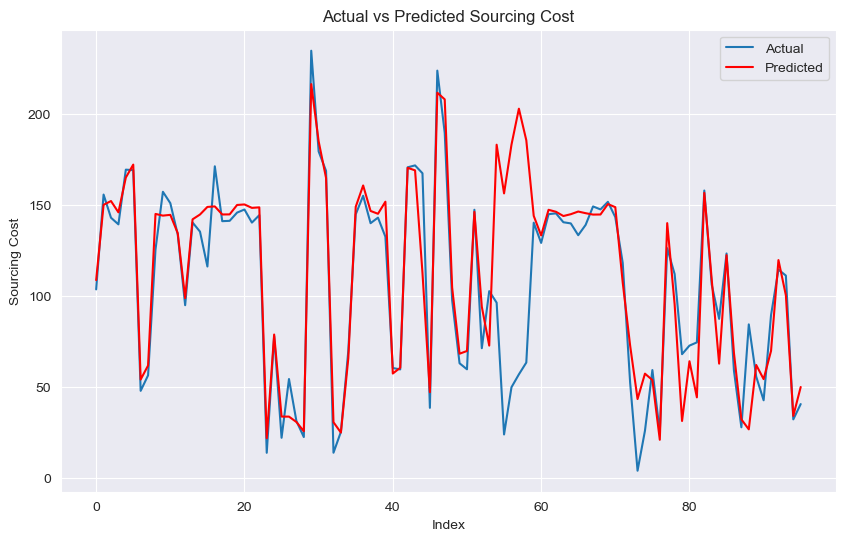

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(test['Sourcing Cost'], label='Actual')
plt.plot(y_pred_test, label='Predicted', color='red')
plt.xlabel('Index')
plt.ylabel('Sourcing Cost')
plt.title('Actual vs Predicted Sourcing Cost')
plt.legend()
plt.grid(True)
plt.show()

## Neural Network

In [42]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model
model_nn = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1)
])

# Compile the model
model_nn.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model_nn.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_split=0.2, verbose=1)

# Evaluate the model
mse_nn = model_nn.evaluate(X_test_scaled, y_test, verbose=0)
print("Mean Squared Error (Neural Network):", mse_nn)


Epoch 1/50
5502/5502 [==============================] - 12s 2ms/step - loss: 5734.8369 - val_loss: 4364.4126
Epoch 2/50
5502/5502 [==============================] - 10s 2ms/step - loss: 5182.7979 - val_loss: 4103.2725
Epoch 3/50
5502/5502 [==============================] - 11s 2ms/step - loss: 5015.9282 - val_loss: 3845.6023
Epoch 4/50
5502/5502 [==============================] - 10s 2ms/step - loss: 4927.1694 - val_loss: 4059.8240
Epoch 5/50
5502/5502 [==============================] - 9s 2ms/step - loss: 4810.8945 - val_loss: 4075.1663
Epoch 6/50
5502/5502 [==============================] - 10s 2ms/step - loss: 4715.6782 - val_loss: 3824.6890
Epoch 7/50
5502/5502 [==============================] - 10s 2ms/step - loss: 4699.0098 - val_loss: 3745.9873
Epoch 8/50
5502/5502 [==============================] - 10s 2ms/step - loss: 4713.8369 - val_loss: 3727.4558
Epoch 9/50
5502/5502 [==============================] - 10s 2ms/step - loss: 4582.2549 - val_loss: 3701.8560
Epoch 10/50
5502/550

In [46]:
# Standardize features
X_test_scaled = scaler.transform(test_data.drop('Sourcing Cost', axis=1))

# Make predictions using the trained neural network model
y_pred_test_nn = model_nn.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE) using the original sourcing costs
mse_test_nn = mean_squared_error(test['Sourcing Cost'], y_pred_test_nn)
print("Mean Squared Error (Test - Neural Network):", mse_test_nn)
rmse_test_nn = np.sqrt(mse_test_nn)
print("Root Mean Squared Error (Test - Neural Network):", rmse_test_nn)

3/3 [==============================] - 0s 2ms/step
Mean Squared Error (Test - Neural Network): 1168.9411762988236
Root Mean Squared Error (Test - Neural Network): 34.1897817527229


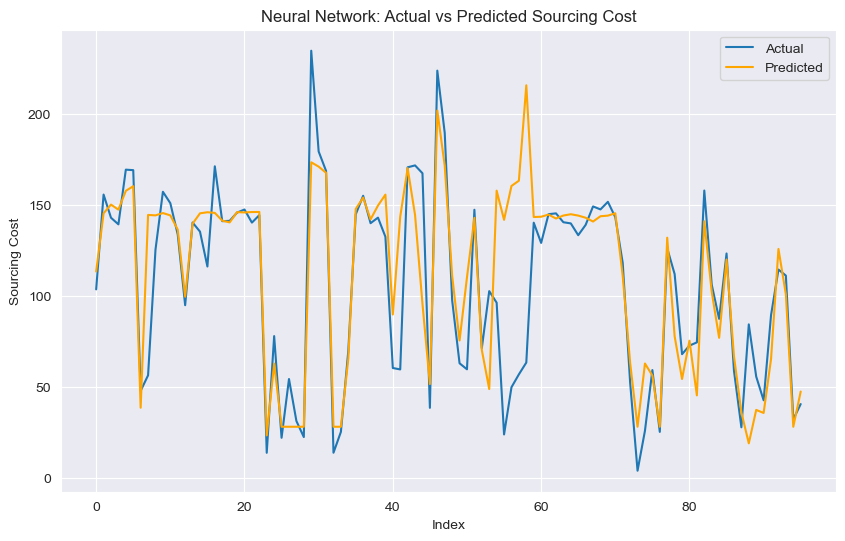

In [47]:
# Plot the actual vs. predicted values for the neural network
plt.figure(figsize=(10, 6))
plt.plot(test['Sourcing Cost'], label='Actual')
plt.plot(y_pred_test_nn, label='Predicted', color='orange')
plt.xlabel('Index')
plt.ylabel('Sourcing Cost')
plt.title('Neural Network: Actual vs Predicted Sourcing Cost')
plt.legend()
plt.grid(True)
plt.show()

# Comparison of Different Approaches:


## Random Forest Regressor:
Mean Squared Error (MSE): 1074.02
Root Mean Squared Error (RMSE): 32.77


## Gradient Boosting Regressor:
MSE: 1427.22
RMSE: 37.78


## LightGBM:
MSE: 1037.75
RMSE: 32.21


## Neural Network:
MSE: 1168.94
RMSE: 34.19

## ARIMA:
MSE: 2406.78
RMSE: 49.06

# Explanation:
## Random Forest Regressor:
Random Forest is an ensemble learning method that builds multiple decision trees and merges their
predictions to improve accuracy. It's known for handling non-linear relationships well and handling large
datasets efficiently. The model performs well and has the lowest RMSE among the traditional machine
learning models.

## Gradient Boosting Regressor:
Gradient Boosting is another ensemble technique that builds trees sequentially, where each tree corrects
the errors of the previous one. It typically provides higher predictive accuracy than Random Forest but
may require more tuning. In this case, it has a higher RMSE compared to Random Forest and LightGBM.

## LightGBM:
LightGBM is a gradient boosting framework that uses tree-based learning algorithms. It's known for its
speed and efficiency, making it suitable for large datasets. It performs slightly better than Random
Forest and has the lowest MSE among the traditional models.

## Neural Network
Neural networks are powerful models capable of learning complex patterns in data. They are versatile and
can capture intricate relationships but require careful tuning and can be computationally expensive. In
this case, the neural network model has a higher RMSE compared to the tree-based models.

## ARIMA:
ARIMA (AutoRegressive Integrated Moving Average) is a time series forecasting model. It's useful for
modeling time-dependent data and capturing temporal patterns. However, in this case, ARIMA has a higher
RMSE compared to the machine learning models, indicating that the machine learning models perform better
for this dataset.

# Final Approach:
## LightGBM Model:
The final approach involves using the LightGBM model. It offers a good balance between accuracy and
efficiency. With an MSE of 1037.75 and an RMSE of 32.21, it performs slightly better than Random Forest
and Gradient Boosting Regressor while being computationally efficient.

# Reason for Choosing LightGBM:
LightGBM is chosen for its efficiency in handling large datasets, its speed, and its good performance in
terms of accuracy. It provides a competitive RMSE while being faster to train compared to neural networks
and gradient boosting methods. Moreover, it requires less tuning compared to gradient boosting methods.
Therefore, LightGBM is the preferred choice for this dataset.